In [11]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
data=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Ice%20Cream.csv")
data.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [14]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [15]:
data.columns

Index(['Temperature', 'Revenue'], dtype='object')

#Train Test Split

In [16]:
x,tx=train_test_split(data,random_state=2529)

#Correlation

In [17]:
t1=x.values.tolist()

n=len(x)
xm=22.281600
ym=522.058000
xsd=8.097597
ysd=175.410399

r=0

for t in t1:
  r+=(t[0]-xm)*(t[1]-ym)

r/=(n*xsd*ysd)
r

0.9635434373955053

#Least Square Approximator

In [18]:
X=np.zeros((n,2))
Y=np.zeros(n)

i=0
for t in t1:
  X[i][0]=t[0]
  X[i][1]=1
  Y[i]=t[1]
  i+=1

Xt=np.transpose(X)

xty=Xt @ Y
xtx=Xt @ X
inx=np.linalg.inv(xtx)
C=inx @ xty

def lsa(temp):
  a=np.zeros(2)
  a[0]=temp
  a[1]=1

  return np.dot(C,a)

# Testing The Model

In [19]:
N=len(tx)
para=tx.values.tolist()
e=0
act=np.zeros(N)
prd=np.zeros(N)
i=0
for t in para:
  act[i]=t[1]
  prd[i]=lsa(t[0])
  j=act[i]-prd[i]
  e+=(j*j)
  i+=1

e=math.sqrt(e/N)
print('Root Mean Square Error')
print(e)

Root Mean Square Error
22.74857906259326


#Visualization of Actual vs Predicted

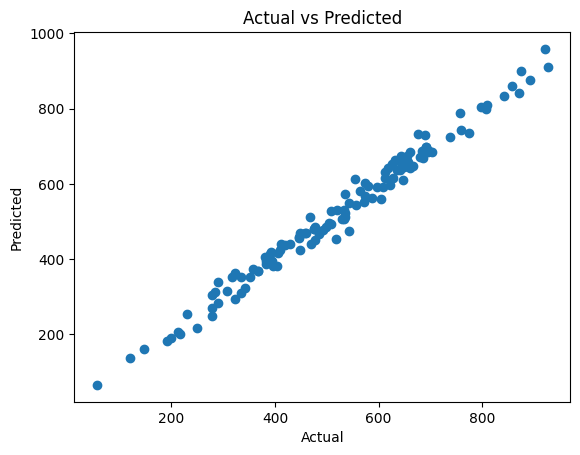

In [20]:
import matplotlib.pyplot as plt
plt.scatter(act,prd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()